# Run PageRank Analysis

In [5]:
import os
os.chdir("..")

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm 
import torch
import os 

In [7]:
import MDAnalysis as mda
import plotly.graph_objs as go
from MDAnalysis.analysis import distances as ds
import networkx as nx

In [9]:
from utils.preprocessing import get_average_trajectory_positions, get_time_distance_matrix
from utils.geometry import angle_between_vectors

## Load data

In [26]:
DATA_FOLDER = "../Zhu-Li Lab - AI to analyze MD simulation data/data/alphaV_vs_alphaIIB-main"
DATASET_TYPE = "alphaV_vs_alphaIIB-main"
SIZE = 4
bound_thd = 5

integrin = "alphaVbeta3" # alpha2bbeta3
extensions = "Extension"
rep = 1
topology = f"{DATA_FOLDER}/{integrin}/{integrin}.pdb"
trajectory = f"{DATA_FOLDER}/{integrin}/{extensions}_Trajectories/Replica{str(rep)}.xtc"
u = mda.Universe(topology, trajectory) # 

EXPORT_FOLDER = f"checkpoints/alphaV_vs_alphaIIB-main/{integrin}/{extensions}/rep{rep}"


In [ ]:
# DATA_FOLDER = "../Zhu-Li Lab - AI to analyze MD simulation data/data/alphaV_vs_alphaIIB-main"
# DATASET_TYPE = "alphaV_vs_alphaIIB-main"
# SIZE = 4
# bound_thd = 5
# frames = 10
# segments = 4

# u = {}
# integrin = "alphaVbeta3"# "alpha2bbeta3"
# extensions = ["Extension", "Bending"]
# for rep in range(1, 4):
#     u[rep-1] = {}
#     for extension in extensions:
#         topology = f"{DATA_FOLDER}/{integrin}/{integrin}.pdb"
#         trajectory = f"{DATA_FOLDER}/{integrin}/{extension}_Trajectories/Replica{str(rep)}.xtc"
#         u[rep-1][extension] = mda.Universe(topology, trajectory)  
#         T = 200 #len(u[rep-1][extension].trajectory)
#         starts = list(range(0, T - frames, (T - frames) // (segments - 1)))
#         # for s in starts:
#         #     e = s + frames
#             # with mda.Writer(f"{DATA_FOLDER}/{integrin}/{extension}_Trajectories/Replica{str(rep)}_{s}-{e}.dcd", u[rep-1][extension].atoms.n_atoms) as W:
#             #     for ts in u[rep-1][extension].trajectory[s:e]:
#             #         W.write(u[rep-1][extension].atoms)    
            

In [ ]:
# extensions = [str(i)+"-"+str(i+frames) for i in starts]
# extensions

['0-10', '63-73', '126-136', '189-199']

In [ ]:
# DATA_FOLDER = "../Zhu-Li Lab - AI to analyze MD simulation data/data/alphaV_vs_alphaIIB-main"
# DATASET_TYPE = "alphaV_vs_alphaIIB-main"
# integrin = "alpha2bbeta3" # "alpha2bbeta3"  "alphaVbeta3"
# setting = "Extension"

# EXPORT_FOLDER = f"checkpoints/alphaV_vs_alphaIIB-main/{integrin}/{setting}"

# if integrin != "alphaVbeta3": 
#     n_replications = 3
# else: 
#     n_replications = 2
    
# u = {rep: None for rep in range(n_replications)}
# for rep in u:
#     u[rep] = {}
    
#     for ext in extensions:
        
#         topology = f"{DATA_FOLDER}/{integrin}/{integrin}.pdb"
#         trajectory = f"{DATA_FOLDER}/{integrin}/{setting}_Trajectories/Replica{str(rep+1)}_{ext}.dcd"
        
#         u[rep][ext] = mda.Universe(topology, trajectory) # 
    
#     topology = f"{DATA_FOLDER}/{integrin}/{integrin}.pdb"
#     trajectory = f"{DATA_FOLDER}/{integrin}/{setting}_Trajectories/Replica{str(rep+1)}.xtc"
    
#     u[rep]["all"] = mda.Universe(topology, trajectory) # 

/opt/homebrew/Caskroom/miniconda/base/envs/research/lib/python3.12/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


## PageRank

In [49]:
N = u[rep][extensions[0]].select_atoms("protein and name CA").atoms.resindices.shape[0]
dist = np.zeros((N, N)) 
triu = np.triu_indices_from(dist, k=1)
dist[triu] = relative_distances
dist.T[triu] = relative_distances 

dist = np.multiply(dist, dist_matrices[extensions[0]])
np.min(relative_distances), np.sum(dist_matrices[extensions[0]] / 2), dist.shape


(-0.3575466224462094, 372.0, (305, 305))

In [50]:
G = nx.Graph()

rep = 0
# add nodes
residue_indices = []
for i in u[rep][extensions[0]].select_atoms("protein and name CA").atoms.resindices:
    if i not in residue_to_domain or ("transmembrane" not in residue_to_domain[i] and "cytoplasmic" not in residue_to_domain[i]):
        residue_indices.append(i)
residue_indices = np.array(residue_indices)
print("residue_indices:", residue_indices.shape)
G.add_nodes_from(residue_indices)
print("There are ", len(G.nodes), "nodes")

# for i in range(dist.shape[0]):
#     for j in range(i+1, dist.shape[1]):
#         abs_dist = np.abs(dist[i,j])
#         if abs_dist > 1e-5: # and i not in pMHC_resids: #  
#         # if abs_dist > 0.1: # and i not in pMHC_resids: #  
#             G.add_edge(i, j, weight=abs_dist)
        
for i in range(dist.shape[0]):
    for j in range(i, dist.shape[1]):
        abs_dist = np.abs(dist[i,j])
        if i != j and abs_dist>0:
            # exclude transmembrane and cytoplasmic
            if i not in residue_to_domain or ("transmembrane" not in residue_to_domain[i] and "cytoplasmic" not in residue_to_domain[i]):
                if j not in residue_to_domain or ("transmembrane" not in residue_to_domain[j] and "cytoplasmic" not in residue_to_domain[j]):
                    G.add_edge(i, j, weight=abs_dist)
    
print(f"There are {len(G.edges)} edges")
print(f"There are {len(G.nodes)} nodes")

residue_indices: (305,)
There are  305 nodes
There are 372 edges
There are 305 nodes


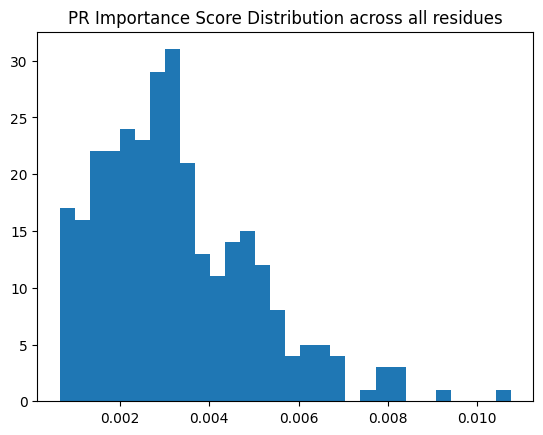

In [51]:
# page rank 
pr = nx.pagerank(G, alpha=0.85, personalization=None, weight="weight", max_iter=100000)
pr_score = list(pr.values())
plt.hist(pr_score, 30)
plt.title("PR Importance Score Distribution across all residues")
plt.show()

## Plot

In [55]:
# DATASET_TYPE = "mPD1-mPDL2"
DATASET_TYPE = "alphaV_vs_alphaIIB-main"
SIZE = 4
bound_thd = 5

# integrin = "alphaVbeta3"
# extensions = "Extension"
# integrin = ""
pct_change = 1e-5

In [56]:
top_k = 10
if DATASET_TYPE != "mPD1-mPDL2":
    residue_ids = u_frees[0].select_atoms("protein and name CA").atoms.resids
    residue_names = u_frees[0].select_atoms("protein and name CA").atoms.resnames
    chainids = u_frees[0].select_atoms("protein and name CA").atoms.chainIDs
    residue_nameid = [chainids[i] + '-' + residue_names[i] + str(residue_ids[i]) for i in range(len(residue_ids))]
    positions = u_free_avg_positions
else:
    residue_ids_ = u[0][extensions[0]].select_atoms("protein and name CA").atoms.resids
    residue_names_ = u[0][extensions[0]].select_atoms("protein and name CA").atoms.resnames
    residue_ids = [residue_ids_[i] for i in residue_indices]
    residue_names = [residue_names_[i] for i in residue_indices]
    if integrin == "alpha2bbeta3":
        residue_nameid = []
        for i in range(len(residue_ids)):
            if residue_ids[i] > 1007:
                residue_nameid.append(residue_names[i] + str(residue_ids[i] - 1007))
            else:
                residue_nameid.append(residue_names[i] + str(residue_ids[i]))
    else:
        residue_nameid = [residue_names[i] + str(residue_ids[i]) for i in range(len(residue_ids))]
    u[0][extensions[0]].trajectory[0]
    positions = u[0][extensions[0]].select_atoms("protein and name CA").positions[residue_indices]
    
df_pr = pd.DataFrame(residue_nameid, columns=["residue"])
df_pr["PR score"] = pr_score
df_pr["x"] = positions[:,0]
df_pr["y"] = positions[:,1]
df_pr["z"] = positions[:,2]
# df_pr = df_pr.sort_values("PR score", ascending=False)
top_residues = df_pr.nlargest(top_k, 'PR score')
df_pr.to_csv(f"results/{integrin}_{setting}/pagerank_{bound_thd}.csv", index=False)

NameError: name 'u_frees' is not defined

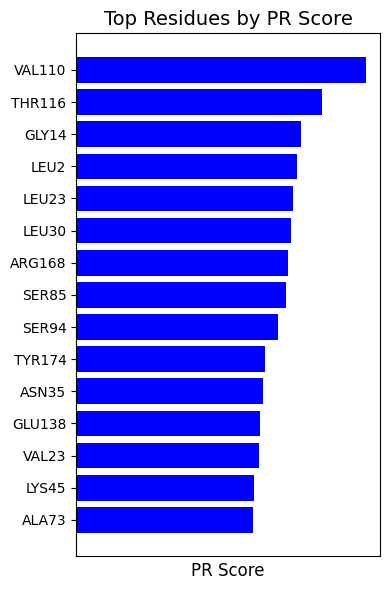

In [54]:
# Sort by PR score and take the top 20
top_residues = df_pr.sort_values("PR score", ascending=False).head(15)

# Plot horizontal bar chart
plt.figure(figsize=(4, 6))
plt.barh(top_residues["residue"], top_residues["PR score"], color="blue")
plt.xlabel("PR Score", fontsize=12)
# plt.ylabel("Residue", fontsize=12)
plt.title("Top Residues by PR Score", fontsize=14)
plt.xticks([])
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest score at the top
plt.tight_layout()
plt.show()

In [40]:
# create nodes data
Xg, Yg, Zg = [], [], [] 
color_score = []
for k in range(positions.shape[0]):
    Xg.append(positions[k][0])
    Yg.append(positions[k][1])
    Zg.append(positions[k][2])
    color_score.append(pr_score[k])
# Create edge data
edges_x = []
edges_y = []
edges_z = []
edge_class = []

# Connect points in pairs (e.g., connect i to i+1)
for i in range(dist.shape[0]):
    for j in range(i+1, dist.shape[1]):
        if np.abs(dist[i,j]) > pct_change: # and Zn[i] <220 and Zn[i] > 150:
            edges_x += [positions[i][0], positions[j][0], None]  # None creates a break in the line
            edges_y += [positions[i][1], positions[j][1], None]
            edges_z += [positions[i][2], positions[j][2], None]
            edge_class += [dist[i,j], dist[i,j], dist[i,j]] 
len(edge_class), len(edges_x), np.sum(candidates_idx)

IndexError: index 1707 is out of bounds for axis 0 with size 1657

In [ ]:
# Create the edge trace, coloring by the attribute vector
axis = dict(showbackground=False, showline=False, zeroline=False,
            showgrid=False, showticklabels=False, title='')
layout = go.Layout(title='', width=1250, height=1250, showlegend=False,
                    scene=dict(xaxis=dict(axis), yaxis=dict(axis), zaxis=dict(axis)),
                    margin=dict(t=100), hovermode='closest')
trace=go.Scatter3d(
    x=Xg,y=Yg,z=Zg,
    mode='markers',
    marker=dict(symbol='circle', size=SIZE, color=color_score, colorscale="Blues", opacity=0.9), # Picnic , colorbar=dict(title='PR score')
    hoverinfo='text' # Blues # colorbar=dict(title='PR score'), 
)
trace6=go.Scatter3d(
    x=Xg,y=Yg,z=Zg,
    mode='markers',
    marker=dict(symbol='circle', size=SIZE, color="gray", colorscale="Blues", opacity=0.1), # colorbar=dict(title='PR score'),  Picnic , colorbar=dict(title='PR score')
    hoverinfo='text' # Blues
)
edge_trace = go.Scatter3d(
    x=edges_x,
    y=edges_y,
    z=edges_z,
    mode='lines',
    line=dict(width=7, color=edge_class, colorscale='piyg', colorbar=dict(title='relative distance change (%)'), cmin=-1, cmax=1),  # Base color for edgescolorbar=dict(title='Relative Distance Change'), 
    opacity=0.8 # piyg
)
trace3=go.Scatter3d(
    x=list(top_residues["x"]),
    y=list(top_residues["y"]),
    z=list(top_residues["z"]),
    mode='markers',
    marker=dict(symbol='circle', size=SIZE+2, color="blue"), # Picnic
    hoverinfo='text'
)
trace_text = go.Scatter3d(
    x=list(top_residues["x"]),
    y=list(top_residues["y"]),
    z=list(top_residues["z"]),
    mode='text',
    text=list(top_residues["residue"]),
    textposition='top center',
    name='Annotations'
)

fig = go.Figure(data=[trace, edge_trace, trace3], layout=layout) #  , trace6, trace_text
fig.show()

fig.write_html(f"{EXPORT_FOLDER}/pagerank-thd{bound_thd}.html")

In [41]:
# zoomed in 
trace=go.Scatter3d(
    x=Xg,y=Yg,z=Zg,
    mode='markers',
    marker=dict(symbol='circle', size=5, color="gray", colorscale="Blues"), # Picnic , colorbar=dict(title='PR score')
    hoverinfo='text'
)
trace=go.Scatter3d(
    x=Xg,y=Yg,z=Zg,
    mode='markers',
    marker=dict(symbol='circle', size=5, color=color_score, colorscale="Blues"), # Picnic , colorbar=dict(title='PR score')
    hoverinfo='text'
)
edge_trace = go.Scatter3d(
    x=edges_x,
    y=edges_y,
    z=edges_z,
    mode='lines',
    line=dict(width=5, color=edge_class,colorscale='piyg', colorbar=dict(title='Relative Distance Change'), cmin=-0.5, cmax=0.5),  # Base color for edges
    opacity=0.5
)
'''
trace4=go.Scatter3d(x=X_CD3,y=Y_CD3,z=Z_CD3,
    mode='markers',
    marker=dict(symbol='circle', size=2, color=color_score_CD3, colorscale="Greens", colorbar=dict(title='CD3 PR score')), # Picnic
    hoverinfo='text'
)

trace2=go.Scatter3d(x=Xg,y=Yg,z=Zg,
    mode='markers',
    marker=dict(symbol='circle', size=2, color="gray", opacity=0.2), # Picnic
    hoverinfo='text'
)
'''
trace3=go.Scatter3d(
    x=list(top_residues["x"]),
    y=list(top_residues["y"]),
    z=list(top_residues["z"]),
    mode='markers',
    marker=dict(symbol='circle', size=5, color="red"), # Picnic
    hoverinfo='text'
)
trace5 = go.Scatter3d(
    x=list(top_residues["x"]),
    y=list(top_residues["y"]),
    z=list(top_residues["z"]),
    mode='text',
    text=list(top_residues["residue"]),
    #textposition='top center',
    name='Annotations'
)
axis=dict(showbackground=False,
        showline=False,
        zeroline=False,
        showgrid=False,
        showticklabels=False,
        title='')
layout = go.Layout(
        title="",
        width=600,
        height=600,
        showlegend=False,
        scene=dict(xaxis=dict(axis),yaxis=dict(axis),zaxis=dict(axis),),
    margin=dict(t=100),
    hovermode='closest')


fig = go.Figure(data=[trace, trace3, trace5, edge_trace, trace6], layout=layout)
fig.show()

fig.write_html(f"{EXPORT_FOLDER}/pagerank-thd{bound_thd}-repall-zoomed.html")
# fig.write_html(f"{EXPORT_DIR}/pagerank-{bound_thd}-zoomed.html")

NameError: name 'trace6' is not defined

### Show edges at interface between two commmunities

In [482]:
communities_list = [3, 10]
communities_list = [10, 11]

In [497]:
edge_nodes = []
for i in range(len(communities_list)):
    community_idx = communities_list[i]
    nodes_in_community = communities[community_idx]['nodes']
    edge_nodes.extend(nodes_in_community)
    
# Create edge data
edges_x = []
edges_y = []
edges_z = []
edge_class = []

# Connect points in pairs (e.g., connect i to i+1)
for i in range(dist.shape[0]):
    for j in range(i+1, dist.shape[1]):
        if np.abs(dist[i,j]) > 0: # and Zn[i] <220 and Zn[i] > 150:
            edges_x += [u_free_avg_positions[i][0], u_free_avg_positions[j][0], None]  # None creates a break in the line
            edges_y += [u_free_avg_positions[i][1], u_free_avg_positions[j][1], None]
            edges_z += [u_free_avg_positions[i][2], u_free_avg_positions[j][2], None]
            edge_weight = dist[i,j] * (i in edge_nodes or j in edge_nodes)
            edge_class += [edge_weight, edge_weight, edge_weight] 
len(edge_class), len(edges_x), np.sum(candidates_idx)

(642, 642, 214)

In [278]:
EXPORT_DIR

'checkpoints/integrin/coord/aVb3 tail alignment replication/16-18'

In [ ]:
# Create the edge trace, coloring by the attribute vector
SIZE = 4
axis = dict(showbackground=False, showline=False, zeroline=False,
                showgrid=False, showticklabels=False, title='')
layout = go.Layout(title='', width=1250, height=1250, showlegend=False,
                    scene=dict(xaxis=dict(axis), yaxis=dict(axis), zaxis=dict(axis)),
                    margin=dict(t=100), hovermode='closest')
fig = go.Figure(layout=layout)
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white', scene=dict(dragmode='orbit'))

fig.add_trace(go.Scatter3d(
    x=Xg,y=Yg,z=Zg,
    mode='markers',
    marker=dict(symbol='circle', size=SIZE, color="lightgray"), # Picnic , colorbar=dict(title='PR score')
    hoverinfo='text',
    opacity=0.7, # Blues
))
fig.add_trace(go.Scatter3d(
    x=edges_x,
    y=edges_y,
    z=edges_z,
    mode='lines',
    line=dict(width=8, color=edge_class, colorscale='piyg', cmin=-0.1, cmax=0.1),  # Base color for edgescolorbar=dict(title='Relative Distance Change'), 
    opacity=0.9 # piyg
))
# fig.add_trace(go.Scatter3d(
#     x=list(top_residues["x"]),
#     y=list(top_residues["y"]),
#     z=list(top_residues["z"]),
#     mode='markers',
#     marker=dict(symbol='circle', size=SIZE+1, color="blue"), # Picnic
#     hoverinfo='text'
# ))
# fig.add_trace(go.Scatter3d(
#     x=list(top_residues["x"]),
#     y=list(top_residues["y"]),
#     z=list(top_residues["z"]),
#     mode='text',
#     text=list(top_residues["residue"]),
#     textposition='top center',
#     name='Annotations'
# ))
import matplotlib.cm as cm
colormap = cm.get_cmap('Spectral_r')
#colors = [colormap(i/len(communities_list)) for i in range(len(communities_list))]
colors = ["orange", "blue", "yellow", "green"]

for i in range(len(communities_list)):
        
        community_idx = communities_list[i]
        
        # color for community
        nodes_in_community = communities[community_idx]['nodes']
        # c = colors[i]
        # c = colormap(avg_edge_masks_normalized[community_idx])
        # community_color = f"rgba({c[0]*255}, {c[1]*255}, {c[2]*255}, {c[3]*255})"
        community_color = colors[i]
        # Plot community mean position and standard deviation
        fig.add_trace(go.Scatter3d(
            x=[Xg[i] for i in nodes_in_community],
            y=[Yg[i] for i in nodes_in_community],
            z=[Zg[i] for i in nodes_in_community],
            mode='markers',
            # marker=dict(symbol='circle', size=SIZE, color=community_color, colorscale="Blues"), # Picnic , colorbar=dict(title='PR score')
            marker=dict(symbol='circle', size=SIZE+3, color=[color_score[i] for i in nodes_in_community], colorscale="Blues"), # Picnic , colorbar=dict(title='PR score')
            hoverinfo='text',
            opacity=0.7, # Blues
        ))

        # # Calculate the center of the community for each extension
        # start_extension = force_idx
        # end_extension = 1 - start_extension
        # start_positions = positions[start_extension]['mean'][nodes_in_community, :]
        # end_positions = positions[end_extension]['mean'][nodes_in_community, :]
        
        # # Draw community average 
        # start_center = np.mean(start_positions, axis=0)
        # end_center = np.mean(end_positions, axis=0)
        # displacement = np.mean(start_positions - end_positions, axis=0)
        # displacement_std = np.std(start_positions - end_positions, axis=0)
        # df_displacement.iloc[i] = list(displacement) + list(displacement_std) + [start_positions.shape[0]]
        
        # # Add circle for the start center
        # fig.add_trace(go.Scatter3d(
        #     x=[start_center[0]], y=[start_center[1]], z=[start_center[2]],
        #     mode='markers', marker=dict(size=4, color='green', symbol='circle')
        # ))
        displacement_txt = f'C{community_idx} n={len(nodes_in_community)}'
        # displacement_std_txt = f'SD △=({displacement_std[0]:.1f}, {displacement_std[1]:.1f}, {displacement_std[2]:.1f})'
        # print(displacement_txt + "  " + displacement_std_txt + f" n={start_positions.shape[0]}")
        # # add text 
        # fig.add_trace(go.Scatter3d(
        #     x=[end_center[0] + 10], 
        #     y=[end_center[1] + 10], 
        #     z=[end_center[2] - 10],
        #     mode='text',
        #     text=[displacement_txt],  # Replace with your desired text
        #     textfont=dict(size=14),   # Set text size
        #     textposition='top center' # Adjust text position relative to the point
        # ))
        # # add text 
        # fig.add_trace(go.Scatter3d(
        #     x=[end_center[0] + 10], 
        #     y=[end_center[1] + 10], 
        #     z=[end_center[2] - 5],
        #     mode='text',
        #     text=[displacement_std_txt],  # Replace with your desired text
        #     textfont=dict(size=14),   # Set text size
        #     textposition='top center' # Adjust text position relative to the point
        # ))

        # # Add line from start_center to end_center
        # fig.add_trace(go.Scatter3d(
        #     x=[start_center[0], end_center[0]], y=[start_center[1], end_center[1]], z=[start_center[2], end_center[2]],
        #     mode='lines',
        #     line=dict(color='green', width=cone_scale*2),
        # ))

        # # Add the arrowhead (cone shape) at the end of the arrow
        # fig.add_trace(go.Cone(
        #     x=[end_center[0]], y=[end_center[1]], z=[end_center[2]],
        #     u=[end_center[0] - start_center[0]],
        #     v=[end_center[1] - start_center[1]],
        #     w=[end_center[2] - start_center[2]],
        #     sizemode="absolute",
        #     sizeref=cone_scale,  # Adjust the size of the cone tip
        #     showscale=False,
        #     anchor="tip",
        #     colorscale=[[0, 'green'], [1, 'green']],
        # ))

fig.show()

fig.write_html(f"{EXPORT_DIR}/pagerank-thd{bound_thd}-repall.html")

/var/folders/gv/3zqh7pw57f340f93mh5tvkl40000gn/T/ipykernel_23614/3242022893.py:44: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

